In [1]:
# download the dataset from drive
!gdown 1RMTWpYws8g92bnTlXli6QkiqFGNzQRSu
!gdown 1RMggHHpcHoCncMRCdgbr-vQgTWK5fMYk

'gdown' is not recognized as an internal or external command,
operable program or batch file.
'gdown' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# read the dataset
import pandas as pd

people_df = pd.read_csv('details.csv')

people_df

,name,details
0,mahesh,stanford university
1,abhijit,northeastern university
2,navya,texas tech university
3,mahi,"university of california,san diego"
4,harish,university of north texas
5,pavan,columbia university
6,sreekar,"university of texas, Austin"
7,ram charan,harvard university
8,kavya,university of san antonio
9,tarun,illinois institute of technology


In [3]:
# create a dictionary of people and their friends
import itertools
import copy
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

edgelist = pd.read_csv('edgelist.csv')

edgelist

,FROM,TO
0,abhijit,kavya
1,mahi,navya
2,harsha,sreekar
3,harish,pavan
4,mahesh,ram charan
5,mahesh,ashwin
6,akruti,shiva
7,akruti,srujana
8,akhila,sathvika
9,akhila,divya


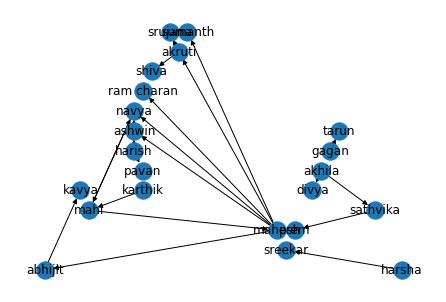

In [4]:
# create a graph from the edgelist
g = nx.DiGraph()

# Add nodes
for k in set(edgelist.FROM.append(edgelist.TO)):
  g.add_node(k)

# Add edges
for i, elrow in edgelist.iterrows():
    g.add_edge(elrow[0], elrow[1])

# draw the graph
nx.draw(g, nx.planar_layout(g), with_labels=True)
plt.show()

In [5]:
import numpy as np
import scipy as sp
import scipy.sparse

def pagerank(G, alpha=0.85, max_iter=100, tol=1.0e-6, weight="weight"):
  # checking if nodes are present in graph or else returning
  N = len(G)
  if N == 0:
    return {}

  # creating list of nodes in Graph G
  nodelist = list(G)

  # creating a adjacency matrix
  M = nx.to_scipy_sparse_matrix(G, nodelist=nodelist, weight=weight, dtype=float)

  # performing sum across rows and flattening matrix
  S = np.array(M.sum(axis=1)).flatten()

  # checking for zeros in S later applying reciprocal of S
  S[S != 0] = 1.0 / S[S != 0]

  # a sparse matrix from diagonals of S
  Q = sp.sparse.spdiags(S.T, 0, *M.shape, format="csr")

  # applying matrix multiplication of Sparse diagonal matrix and adjancency matrix for eigen vector
  M = Q * M

  # initial vector
  x = np.repeat(1.0 / N, N)

  # The outedges to be assigned to any dangling nodes, i.e., nodes without any outedges. The dict key is the node the outedge points to and the dict value is the weight of that outedge. By default, dangling nodes are given outedges according to the personalization vector (uniform if not specified) This must be selected to result in an irreducible transition matrix. It may be common to have the dangling dict to be the same as the personalization dict.
  # identifying dangling nodes 
  is_dangling = np.where(S == 0)[0]

  # power iteration: make up to max_iter iterations
  for _ in range(max_iter):
    xlast = x
    # pagerank formula
    x = alpha * (x * M + sum(x[is_dangling]) * x) + (1 -alpha) * x
    # check convergence, l1 norm
    err = np.absolute(x - xlast).sum()
    if err < N * tol:
      return dict(zip(nodelist, map(float, x)))
  raise nx.PowerIterationFailedConvergence(max_iter)

In [6]:
# calculate the pagerank
pagerank_mapper = pagerank(g)
pagerank_mapper

{'abhijit': 0.03536541721033987,
 'sreekar': 1.779721117416773e-07,
 'kavya': 0.041819788922043175,
 'mahi': 0.3034713487373133,
 'prem': 1.734103749195827e-06,
 'karthik': 4.495175353228999e-09,
 'pavan': 9.123364354745313e-08,
 'mahesh': 0.17943637831740422,
 'srujana': 0.020909896708609266,
 'tarun': 1.779721117416773e-07,
 'harsha': 4.495175353228999e-09,
 'ashwin': 0.03536550394880806,
 'divya': 9.123364354745313e-08,
 'sumanth': 0.03536541721033987,
 'shiva': 0.020909896708609266,
 'gagan': 4.495175353228999e-09,
 'navya': 0.256623131591074,
 'akhila': 4.495175353228999e-09,
 'akruti': 0.03536541721033987,
 'ram charan': 0.03536541721033987,
 'harish': 4.495175353228999e-09,
 'sathvika': 9.123364354745313e-08}

In [7]:
# create a column for pagerank in the people dataframe
people_df['pagerank'] = people_df.name.map(pagerank_mapper)

In [8]:
# dictionary of people and their pagerank
people_mapper = dict(enumerate(people_df.name.unique()))
# reverse the dictionary
reverse_people_mapper = {v:k for k, v in people_mapper.items()}

In [9]:
import pandas as pd
import numpy as np
import collections
import re

# create a list of all the documents in the corpus and clean them
docs = [re.sub(' +', ' ', re.sub(r"[^a-zA-Z0-9]", " ", doc.lower().strip())) for doc in people_df.details]

# create a list of all the words in the corpus
wordlist = list(set(' '.join(docs).split(' ')))

# create a dataframe of the bag of words
def calculateBOW(wordset,l_doc):
  tf_diz = dict.fromkeys(wordset,0)
  for word in l_doc.split(' '):
      tf_diz[word]=l_doc.count(word)
  return tf_diz

# create a list of the bag of words
mod_people_df_cols = [calculateBOW(wordlist, doc) for doc in docs]

In [10]:
# create a dataframe of the bag of words
mod_people_df = pd.DataFrame(mod_people_df_cols)

# fill the NaN values with 0
mod_people_df.fillna(0, inplace=True)

# add the name column to the dataframe
mod_people_df['name'] = mod_people_df.index

# add the pagerank column to the dataframe
mod_people_df['pagerank'] = people_df.pagerank

mod_people_df

,of,stanford,harvard,illinois,michigan,kent,diego,institute,san,texas,...,columbia,university,antonio,carolina,florida,california,western,austin,name,pagerank
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1.794364e-01
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3.536542e-02
2,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,2,2.566231e-01
3,1,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,1,0,0,3,3.034713e-01
4,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,4,4.495175e-09
5,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,5,9.123364e-08
6,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,6,1.779721e-07
7,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,7,3.536542e-02
8,1,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,8,4.181979e-02
9,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,9,1.779721e-07


In [11]:
# scale the pagerank column
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(mod_people_df)
scaled_data = scaler.transform(mod_people_df)

scaled_data

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.91279464e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 6.25000000e-02, 1.16536251e-01],
       [0.00000000e+00

In [12]:
# nearest neighbors
from sklearn.neighbors import NearestNeighbors
import numpy as np

nbrs = NearestNeighbors(n_neighbors=10, algorithm='auto').fit(scaled_data)

In [13]:
# get the distances and indices of the nearest neighbors for friend suggestion
def get_suggestions(G,model,scaled_data,reverse_people_mapper,find_friends_for):
    distances, indices = model.kneighbors([scaled_data[reverse_people_mapper.get(find_friends_for)].tolist()])
    return list(mod_people_df.iloc[indices[0]].name.map(people_mapper).iloc[1:])

get_suggestions(g,nbrs,scaled_data,reverse_people_mapper,'gagan')

['akhila',
 'srujana',
 'sathvika',
 'ram charan',
 'pavan',
 'abhijit',
 'mahesh',
 'shiva',
 'sumanth']

In [14]:
# check if the suggested friends are actually friends
def follows_back(G,a,b):
    return G.has_edge(b,a)

follows_back(g,'mahesh','mahi')

True

In [15]:
# get the friends of the suggested friends who are not already friends
def get_true_suggestions(G,find_friends_for,suggestions,n=5):
    return list(filter(lambda suggestion: not follows_back(G,find_friends_for,suggestion),suggestions))[:n]

get_true_suggestions(g,'gagan',get_suggestions(g,nbrs,scaled_data,reverse_people_mapper,'gagan'))

['akhila', 'srujana', 'sathvika', 'ram charan', 'pavan']

In [18]:
# get max key of values in pagerank_mapper
max(pagerank_mapper, key=pagerank_mapper.get)

'mahi'

In [19]:
# get min key of values in pagerank_mapper
min(pagerank_mapper, key=pagerank_mapper.get)

'karthik'